In [3]:
from wordcloud import WordCloud ,ImageColorGenerator
import jieba.analyse
import os
import numpy as np
from PIL import  Image
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_excel("./论文集合.xlsx", sheet_name=0)
df['标题'] = df['题目'].apply(lambda x: x.strip("基于"))
df

,学生,学号,题目,指导教师,提交状态,审核状态,学生账号状态,标题
0,卢蒲玉,2184233144,图们江流域土地利用变化特征分析,许镇,未提交,等待审核,启用,图们江流域土地利用变化特征分析
1,丁月龙,2184232452,哈长城市群水资源承载力时空格局及耦合协调度研究,赵春子,未提交,等待审核,启用,哈长城市群水资源承载力时空格局及耦合协调度研究
2,陈华良,2184232448,图们江跨国界流域1988-2016年土地利用/覆盖变化研究,张达,未提交,等待审核,启用,图们江跨国界流域1988-2016年土地利用/覆盖变化研究
3,杨纪元,2184232442,基于遥感数据的延边州耕地面积空间格局变化分析,许镇,未提交,等待审核,启用,遥感数据的延边州耕地面积空间格局变化分析
4,艾俊达,2184232429,气候变化对图们江流域森林物候期的影响,崔桂善,未提交,等待审核,启用,气候变化对图们江流域森林物候期的影响
...,...,...,...,...,...,...,...,...
98,杨刚玉,2184230147,基于RS和GIS的珲春市植被覆盖动态变化研究,许镇,未提交,等待审核,启用,RS和GIS的珲春市植被覆盖动态变化研究
99,聂蕾蕾,2184230125,基于GIS的天水市土地利用变化研究,俞杭男,未提交,等待审核,启用,GIS的天水市土地利用变化研究
100,王丹,2184230124,基于遥感影像珲春市土地利用变化研究,许镇,未提交,等待审核,启用,遥感影像珲春市土地利用变化研究
101,文博,2184230122,基于GIS与RS的耕地格局变化与预测——以甘肃省天水市为例,朴东范,未提交,等待审核,启用,GIS与RS的耕地格局变化与预测——以甘肃省天水市为例


In [9]:
text = "".join(df['标题'].to_list())
text

'图们江流域土地利用变化特征分析哈长城市群水资源承载力时空格局及耦合协调度研究图们江跨国界流域1988-2016年土地利用/覆盖变化研究遥感数据的延边州耕地面积空间格局变化分析气候变化对图们江流域森林物候期的影响海拔对森林物候期的影响——以图们江流域为例不同土地利用下的植被指数对气象因子的响应研究-以长春市为例GIS的乡村文化景观规划研究夜光遥感数据的新冠疫情对经济发展影响分析——以延边朝鲜自治州为例图们江跨国界流域食物供给服务供需动态研究2010-2020年鸭绿江流域的土地利用变化研究ArcGIS的天津市大型主题公园选址研究鸭绿江流域跨国界地区生态系统功能时空格局研究吉林市近二十年土地利用变化分析及预测2000-2020年吉林省水域与农田用地的演变GIS和RS技术的图们市洪水灾害模拟研究3S技术的吉林市土地利用动态演变研究土地利用变化与生态脆弱性评价-以珲春市为例空间分析的吉林省人口分布不同SSPs情境下全球城市扩张模拟OMI数据下延边地区大气SO₂时空变化特征GIS的松原市土地利用变化分析黑龙江省土地利用变化对生态系统服务价值的影响图们江跨国界流域水源涵养服务时空动态变化研究哈长城市群城市化质量评价研究3S技术的长春市土地利用时空格局演变LUCC的长春市生态环境质量时空变化分析图们江跨国界流域碳固持服务供需动态研究遥感技术2000-2020年鸭绿江出海口范围内海水温度变化特征研究GIS技术的吉林市土地利用变化分析城市土地利用变化对城市热岛程度的影响研究—以长春市为例遥感数据的延边朝鲜族自治州土地利用变化特征分析GIS和RS技术的泥石流灾害危险性评价长春市生态系统服务价值动态评估长春市土地利用/覆盖变化研究GIS的长春市土地利用动态变化研究NDVI的图们江流域森林净初级生产力时空分布变化GIS的大连市住宿酒店空间布局研究厦门市城市生态脆弱性评价Landsat影像的珲春市植被覆盖度变化研究卷积神经网络的典型地物信息提取长白山跨国界地区生态系统服务物质流的探究元胞自动机的大理市土地利用变化模拟与预测分析云南石林县植被覆盖与地形因子空间关系分析Python的遥感分类软件设计与实现遥感数据的北极地区海冰变化密集度变化分析夜光遥感数据的珲春市区域经济空间格局精细化模拟地理大数据的长白山地区生态系统服务对人类福祉的影响研究landsat影像的城市扩张研究——以青岛市为例Arc

In [42]:
freq = jieba.analyse.extract_tags(sentence=text, topK=50, withWeight=True)
freq = [(i[0], str(i[1])) for i in freq]
freq[:10]

[('土地利用', '0.4111854943747927'),
 ('GIS', '0.3097090026658031'),
 ('变化', '0.2822071289529015'),
 ('研究', '0.24083072438840675'),
 ('图们江', '0.21594256803853626'),
 ('时空', '0.20092555779575133'),
 ('为例', '0.18582540159948185'),
 ('分析', '0.16940069357875645'),
 ('遥感', '0.15554935395360103'),
 ('流域', '0.15444842291020727')]

In [39]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [54]:
with open('./tom.jpg', 'rb') as f:
    qrcode = base64.b64encode(f.read()).decode()
    
graph = WordCloud()
graph.add(
    series_name="热点分析",
    data_pair=freq,
    mask_image=qrcode,
    word_size_range=[6, 66],
    shape="cardioid")
graph.set_global_opts(
        title_opts=opts.TitleOpts(
            title="热点分析",
            title_textstyle_opts=opts.TextStyleOpts(font_size=23)),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
graph.load_javascript()

ValueError: stat: path too long for Windows

In [46]:
graph.render_notebook()

In [49]:
wd = WordCloud(
    width=600,
    height=1000,
    font_path='./黑体.ttc',  # 指定字体
    mode='RGBA' ,   # 颜色模型
    max_font_size=20,   # 最大字体
    random_state=100,# 随机种子
    # mask = mask,    # 掩膜,
    # color_func=color,
    scale=11.0,# 计算过程和实际绘图的比例，参数大小和分辨率正相关，浮点型
    background_color='white',  # 背景色
    relative_scaling=0.5,    # 单词出现频率对其字体大小的权重
    ).generate_from_frequencies(freq)

TypeError: __init__() got an unexpected keyword argument 'width'

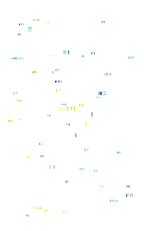

In [50]:
wd.to_array()
plt.imshow(wd, interpolation="bilinear")
plt.axis('off')
plt.show()

In [53]:
import base64
import json
with open('./tom.jpg', 'rb') as f:
    qrcode = base64.b64encode(f.read()).decode()
    
images = []
element1 = {'name': 'http://www.baidu.com',
            'data': qrcode
           }
element2 = {'name': 'http://www.baidu.com',
            'type': 1
           }
images.append([element1, element2])
print('images:{}'.format(images))
json_str = json.dumps(images)
print('json_str:{}'.format(json_str))
#convert JSON object to str
data = json.loads(json_str)
print('data:{}'.format(data))


images:[[{'name': 'http://www.baidu.com', 'data': '/9j/4AAQSkZJRgABAQAAAQABAAD/4gIoSUNDX1BST0ZJTEUAAQEAAAIYAAAAAAIQAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAAHRyWFlaAAABZAAAABRnWFlaAAABeAAAABRiWFlaAAABjAAAABRyVFJDAAABoAAAAChnVFJDAAABoAAAAChiVFJDAAABoAAAACh3dHB0AAAByAAAABRjcHJ0AAAB3AAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAFgAAAAcAHMAUgBHAEIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z3BhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABYWVogAAAAAAAA9tYAAQAAAADTLW1sdWMAAAAAAAAAAQAAAAxlblVTAAAAIAAAABwARwBvAG8AZwBsAGUAIABJAG4AYwAuACAAMgAwADEANv/bAEMACgcHCAcGCggICAsKCgsOGBAODQ0OHRUWERgjHyUkIh8iISYrNy8mKTQpISIwQTE0OTs+Pj4lLkRJQzxINz0+O//bAEMBCgsLDg0OHBAQHDsoIig7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7O